c:\Users\radir\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\radir\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


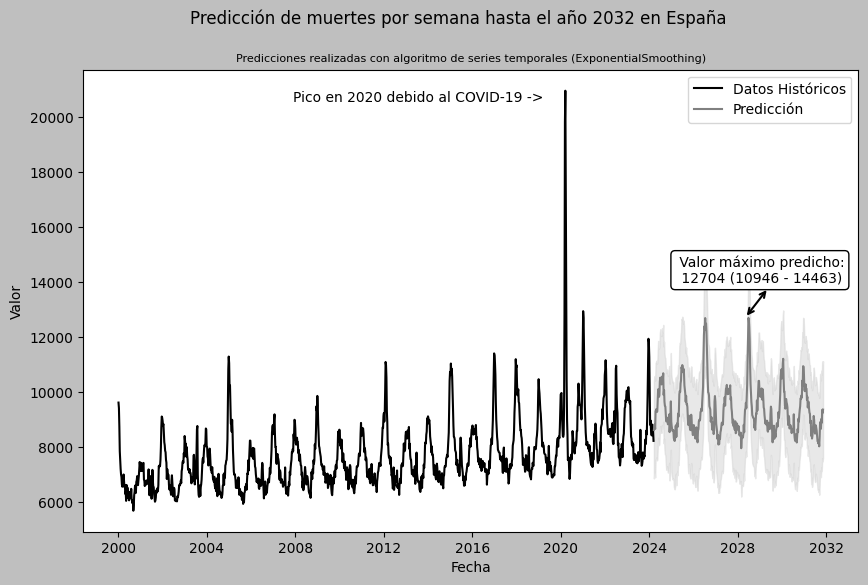

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Leer los datos del archivo CSV
df = pd.read_csv("35177.csv")

# Convertir la columna Semana a tipo datetime con el formato correcto
df['Semana'] = pd.to_datetime(df['Semana'], format='%d/%m/%Y')

# Ordenar los datos por fecha
df = df.sort_values(by='Semana')

# Configurar la columna Semana como índice
df = df.set_index('Semana')

# Aplicar el suavizado exponencial
model = ExponentialSmoothing(df['Valor'], trend='add', seasonal='add', seasonal_periods=600)
fit = model.fit()

# Predicción hasta el año 2030
fechas_2030 = pd.date_range(start=df.index[-1], periods=400, freq='W')  # 400 semanas hasta el año 2030
prediccion_2030 = fit.forecast(steps=len(fechas_2030))

# Obtener intervalos de confianza alrededor de la predicción
alpha = 0.05  # Nivel de confianza (95%)
std_err = fit.forecast(steps=len(fechas_2030)).std()  # Error estándar de la predicción
z_score = 1.96  # Valor z para un nivel de confianza del 95%
lower_ci = prediccion_2030 - z_score * std_err
upper_ci = prediccion_2030 + z_score * std_err

# Establecer el estilo en blanco y negro
plt.style.use('grayscale')

# Graficar los datos históricos
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Valor'], label='Datos Históricos', color='black')

# Graficar la predicción con un margen de error
plt.plot(fechas_2030, prediccion_2030, label='Predicción', color='gray')
plt.fill_between(fechas_2030, lower_ci, upper_ci, color='lightgray', alpha=0.5)

# Añadir anotación para un valor de la predicción y su intervalo de confianza
valor_anotacion = prediccion_2030.max()  # Valor máximo de la predicción
lower_ci_anotacion = lower_ci.max()  # Límite inferior del intervalo de confianza para el valor máximo
upper_ci_anotacion = upper_ci.max()  # Límite superior del intervalo de confianza para el valor máximo
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
plt.text(fechas_2030[250], 15000, f' Valor máximo predicho:\n {int(valor_anotacion)} ({int(lower_ci_anotacion)} - {int(upper_ci_anotacion)})', ha='center', va='top', bbox=bbox_props)

# Añadir flecha desde la anotación hasta el valor máximo
plt.annotate('', xy=(fechas_2030[215], valor_anotacion), xytext=(fechas_2030[270], 13800), arrowprops=dict(arrowstyle='<->', lw=1.5))

# Añadir nota sobre el pico en 2020 debido al COVID-19
plt.text(pd.to_datetime('2007-12-01'), df['Valor'].max(), 'Pico en 2020 debido al COVID-19 ->', ha='left', va='top', color='black')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Predicciones realizadas con algoritmo de series temporales (ExponentialSmoothing)',fontsize=8)
plt.suptitle("Predicción de muertes por semana hasta el año 2032 en España")
plt.legend()
plt.show()
